# Практика по определению моделей в Keras

В каждом из заданий ниже, реализуйте модель, повторяющую архитектуру на приложенной картинке. При определении моделей, можете использовать как Sequential так и Functional API.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

2024-05-01 16:23:20.774858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 16:23:21.749406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Задание 1

Реализуйте модель описанную ниже. Активацию последнего слоя сделайте "softmax".

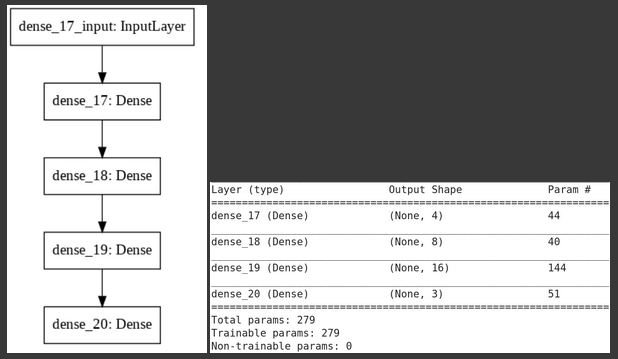


/home/hik0/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279 (1.09 KB)

 Trainable params: 279 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

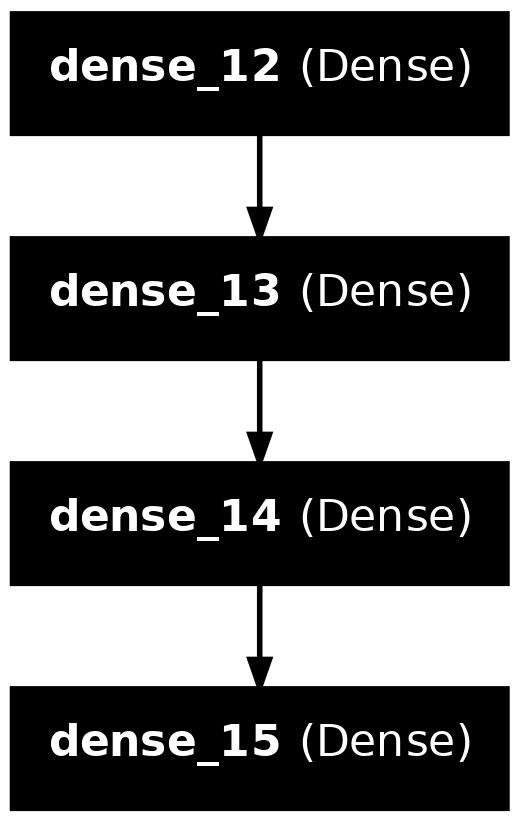

In [7]:
# <YOUR CODE STARTS HERE >

# input_layer = tf.keras.layers.Input(shape=(4, ), name="Input")
model = tf.keras.Sequential([
    Dense(4, input_shape=(10, )),
    Dense(8),
    Dense(16),
    Dense(3, activation="softmax"),
])
# <YOUR CODE ENDS HERE >
model.summary()
tf.keras.utils.plot_model(model, show_shapes=False, show_layer_names=True)

In [6]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Задание 2

Реализуйте модель описанную ниже.

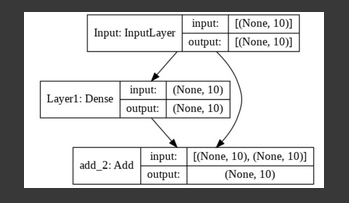


*Кстати, такая кострукция не лишена смысла -- в следующем модуле мы увидим как она помогла совершить прорыв в классификации изображений. Она носит название residual block*

Подсказка: на последнем слое используйте метод `Add()` класса layers, на вход которому нужно подать массик из `input_layer` и `l1_output`.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer1 (Dense)      │ (None, 10)        │        110 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Add (Add)           │ (None, 10)        │          0 │ Input[0][0],      │
│                     │                   │            │ Layer1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110 (440.00 B)

 Trainable params: 110 (440.00 B)

 Non-trainable params: 0 (0.00 B)

Simple tests passed


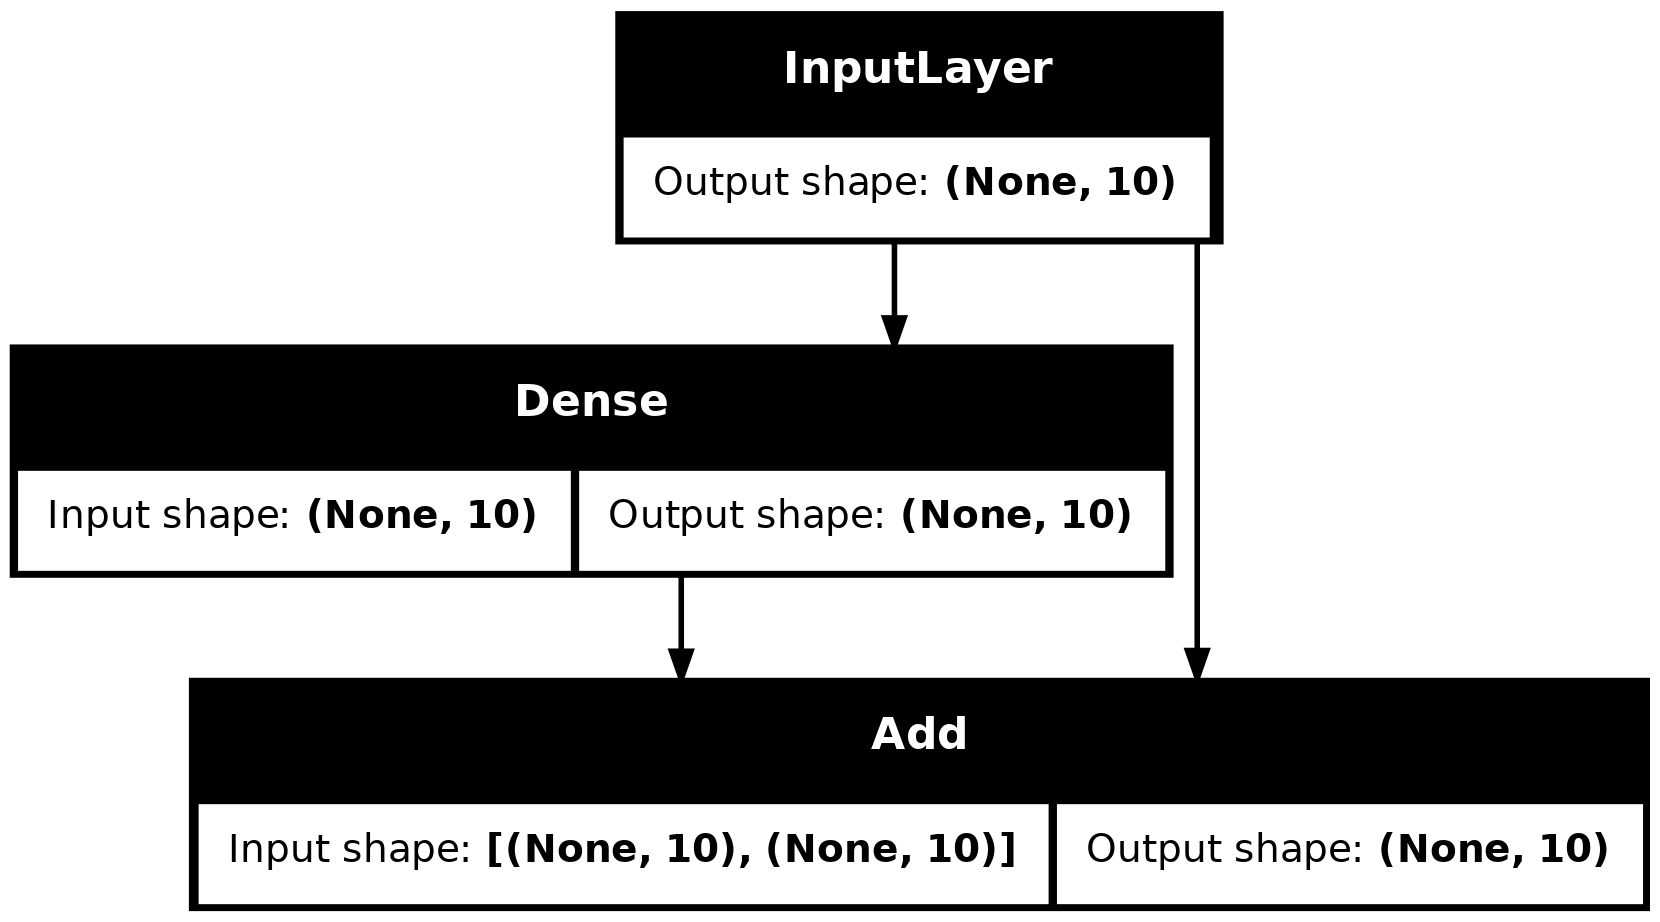

In [11]:
# <YOUR CODE STARTS HERE >
input_layer = tf.keras.layers.Input(shape=(10,), name="Input")
l1 = Dense(10, name="Layer1")(input_layer)
output = tf.keras.layers.Add(name="Add")([input_layer, l1])

model = tf.keras.Model(inputs=input_layer, outputs=output)

# <YOUR CODE ENDS HERE >
model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Задание 3

Реализуйте модель описанную ниже. Вам пригодится tf.keras.layers.Concatenate.
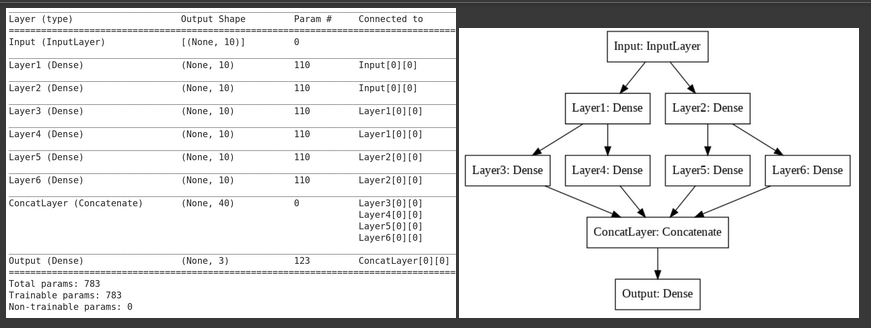

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer1 (Dense)      │ (None, 10)        │        110 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer2 (Dense)      │ (None, 10)        │        110 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer3 (Dense)      │ (None, 10)        │        110 │ Layer1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer4 (Dense)      │ (None, 10)        │        110 │ Layer1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer5 (Dense)      │ (None, 10)        │        110 │ Layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Layer6 (Dense)      │ (None, 10)        │        110 │ Layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 40)        │          0 │ Layer3[0][0],     │
│ (Concatenate)       │                   │            │ Layer4[0][0],     │
│                     │                   │            │ Layer5[0][0],     │
│                     │                   │            │ Layer6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 3)         │        123 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 783 (3.06 KB)

 Trainable params: 783 (3.06 KB)

 Non-trainable params: 0 (0.00 B)

Simple tests passed


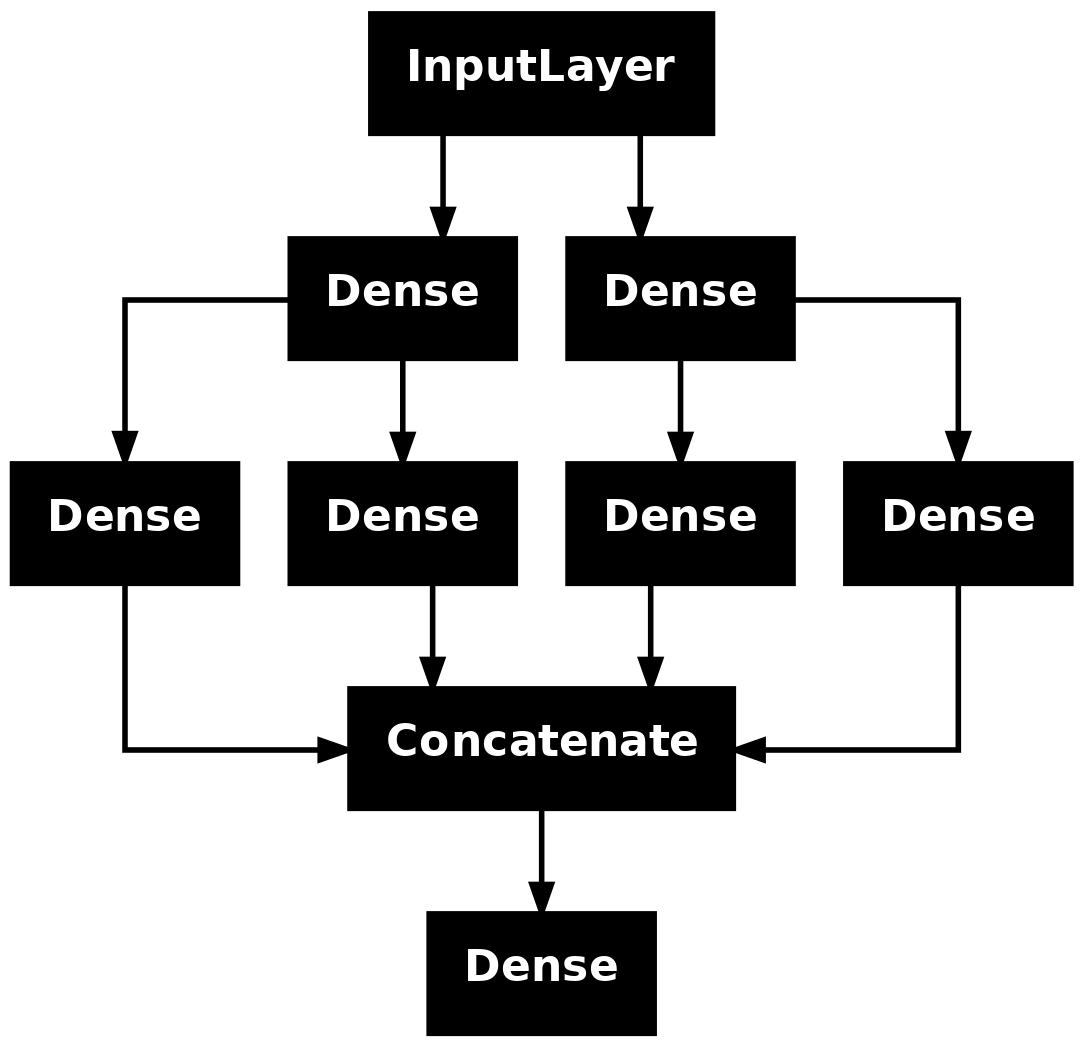

In [12]:
# <YOUR CODE STARTS HERE >

input_layer = tf.keras.layers.Input(shape=(10,))
l1 = Dense(10, name="Layer1")(input_layer)
l2 = Dense(10, name="Layer2")(input_layer)
l3 = Dense(10, name="Layer3")(l1)
l4 = Dense(10, name="Layer4")(l1)
l5 = Dense(10, name="Layer5")(l2)
l6 = Dense(10, name="Layer6")(l2)
concat_layer = tf.keras.layers.Concatenate()([l3, l4, l5, l6])
output_layer = Dense(3)(concat_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# <YOUR CODE ENDS HERE >

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)